<a href="https://colab.research.google.com/github/Waracho/screenshotUX/blob/main/ReconocimientoWeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MulongXie/UIED
!git clone https://github.com/Pritush09/Web-Elements-Detection

fatal: destination path 'UIED' already exists and is not an empty directory.
fatal: destination path 'Web-Elements-Detection' already exists and is not an empty directory.


In [ ]:
!pip install YOLO
!pip install ultralytics


In [28]:
from ultralytics import YOLO
import numpy as np
import PIL
import cv2


def tipo(obj):
  if obj == 10:
    return 'texto'
  if obj == 1:
    return 'boton'
  if obj == 8:
    return 'logo'
  if obj == 7:
    return 'link'
  if obj == 0:
    return 'breadcrumbs'
  if obj == 5 or obj == 6:
    return 'imagen'
  else:
    return str(obj)



def is_link_blue(screenshot):

    cv2.imwrite("temp.png", screenshot)
    screenshot = cv2.imread("temp.png")

    blue_lower = np.array([80, 0, 0], dtype=np.uint8)
    blue_upper = np.array([255, 120, 120], dtype=np.uint8)

    mask = cv2.inRange(screenshot, blue_lower, blue_upper)
    blue_pixels = cv2.countNonZero(mask)

    width, height, _ = screenshot.shape
    total_pixels = width * height
    blue_ratio = blue_pixels / float(total_pixels)

    return blue_ratio > 0.05


def calculate_contrast(image):
    # Convertir la imagen a escala de grises
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calcular la desviación estándar de los píxeles en la imagen en escala de grises
    std_dev = np.std(grayscale_image)

    return std_dev > 30


def detected_elements(image_path, model_path):

    # Cargar imagen
    uploaded_image = PIL.Image.open(image_path)

    # Intentar cargar el modelo YOLO
    try:
        model = YOLO(model_path)
    except Exception as ex:
        print(f"Unable to load model. Check the specified path: {model_path}")
        print(ex)
        exit()

    confidence = float(40) / 100 #25, 100, 40
    res = model.predict(uploaded_image)
    boxes = res[0].boxes

    elementos = []
    # Iterar sobre cada caja detectada
    for i, box in enumerate(boxes):

        top_x = int(box.xyxy[0][0].item())  # Acceder al primer elemento dentro del primer tensor
        top_y = int(box.xyxy[0][1].item())
        bottom_x = int(box.xyxy[0][2].item())
        bottom_y = int(box.xyxy[0][3].item())

        # Recortar la subimagen correspondiente a la caja
        subimage = uploaded_image.crop((top_x, top_y, bottom_x, bottom_y))
        obj_type = box.cls.item()  # Aquí se accede al tipo de imagen
        elementos.append([np.array(subimage), tipo(int(obj_type))])
    return elementos






0: 288x640 1 breadcrumb, 1 button, 1 link, 5 texts, 2006.2ms
Speed: 3.2ms preprocess, 2006.2ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)
link mal color del link


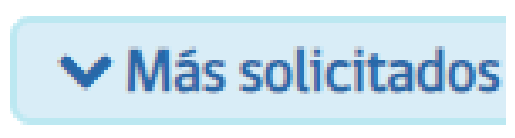

texto mal contraste


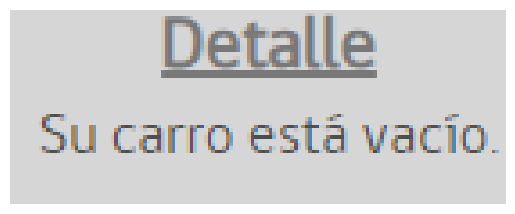

In [29]:
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image)
    plt.axis('off')  # Desactivar los ejes
    plt.show()

# Ruta del modelo y configuración de detección
model_path = 'Web-Elements-Detection/best.pt'
image_path = 'registro.png'  # Cambiar a la ruta de tu imagen

elementos = detected_elements(image_path, model_path)

for image, obj in elementos:
  if not calculate_contrast(image):
    print(obj, "mal contraste")
    show_image(image)

  if obj == 'link':
    if not is_link_blue(image):
      print(obj, "mal color del link")
      show_image(image)



In [26]:
def show_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Desactivar los ejes
    plt.show()


show_image(cv2.imread("rojo.png"))
is_link_blue(cv2.imread("rojo.png"))

In [27]:
show_image(cv2.imread("mala-elección2.png"))
calculate_contrast(cv2.imread("mala-elección2.png"))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
